<a href="https://colab.research.google.com/github/Dheepthi-Reddy/DheepthiReddy_INFO5731_Fall2024/blob/main/Vangeti_Dheepthi_Assignment_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

# importing necessary librares
import csv
import collections
import pandas as pd
import re

# (1)

# defined a function to load the dataset and extract 'Clean_Review' column
def loadData(file_path):
    cleanedReviews = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            cleanedReviews.append(row['Clean_Review'])
    return cleanedReviews

# defined a function to generate N-grams manually
def createNgrams(text, n):
    tokens = text.split()                 # to split text into tokens
    ngrams = []                           # initialized a list to store the N-grams
    for i in range(len(tokens) - n + 1):  # to loop to generate N-grams
        ngram = " ".join(tokens[i:i + n]) # to join 'n' words to form an N-gram
        ngrams.append(ngram)
    return ngrams

# defined a function to count N-grams manually
def countNgrams(reviews, n):
    ngram_counts = {}                         # dictionary to store counts
    for review in reviews:
        ngrams = createNgrams(review, n)   # to generate N-grams for each review
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1       # initialize count if N-gram is new
    return ngram_counts

# defined a function to get the top N most frequent N-grams
def topNgrams(ngram_counts, top_n=10):
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_ngrams[:top_n]

# Load the cleaned reviews from the dataset
cleanedReviews = loadData('UserReviews_Cleaned.csv')

# to get counts for unigrams, bigrams, and trigrams
unigramCount = countNgrams(cleanedReviews, 1)
bigramCount = countNgrams(cleanedReviews, 2)
trigramCount = countNgrams(cleanedReviews, 3)

# Get the top 10 most common N-grams
topUnigrams = topNgrams(unigramCount)
topBigrams = topNgrams(bigramCount)
topTrigrams = topNgrams(trigramCount)

print("List of top 10 Unigrams:")
for unigram, freq in topUnigrams:
    print(f"'{unigram}': {freq}")

print("\nList of top 10 Bigrams:")
for bigram, freq in topBigrams:
    print(f"'{bigram}': {freq}")

print("\nList of top 10 Trigrams:")
for trigram, freq in topTrigrams:
    print(f"'{trigram}': {freq}")

List of top 10 Unigrams:
'movi': 2872
'film': 1483
'guardian': 1482
'charact': 1379
'one': 1097
'marvel': 1042
'rocket': 1029
'like': 1003
'stori': 794
'good': 750

List of top 10 Bigrams:
'guardian galaxi': 555
'jame gunn': 488
'high evolutionari': 271
'marvel movi': 250
'galaxi vol': 234
'adam warlock': 198
'feel like': 136
'one best': 114
'first two': 104
'felt like': 96

List of top 10 Trigrams:
'guardian galaxi vol': 201
'guardian galaxi volum': 52
'marvel cinemat univers': 50
'best marvel movi': 45
'guardian galaxi movi': 33
'director jame gunn': 31
'thank jame gunn': 26
'thor love thunder': 26
'first two movi': 25
'best mcu movi': 25


In [2]:
# (2)

# function to generate unigrams and bigrams
def unigramsBigrams(reviews):
    unigramsCount = {}
    bigramsCount = {}

    # to iterate through each review in the list of reviews
    for review in reviews:
        tokens = review.split()
        # to iterate through each word in the review
        for i in range(len(tokens)):
            unigram = tokens[i]
            unigramsCount[unigram] = unigramsCount.get(unigram, 0) + 1

            # to check if there is a next word for bigram generation
            if i < len(tokens) - 1:
                bigram = f"{tokens[i]} {tokens[i+1]}"
                bigramsCount[bigram] = bigramsCount.get(bigram, 0) + 1

    return unigramsCount, bigramsCount

# defined a function to calculate bigram probabilities
def calculateProbabilities(bigramsCount, unigramsCount):
    bigramProbabilities = []

    # to loop through each bigram and its count in the bigramsCount dictionary
    for bigram, count in bigramsCount.items():
        w1, w2 = bigram.split()
        # to check if w1 exists in unigram_counts to avoid division by zero
        if w1 in unigramsCount:
            probability = count / unigramsCount[w1]
            bigramProbabilities.append({"word": bigram, "probability": probability})

    return bigramProbabilities

# generating unigrams and bigrams from the cleaned reviews
unigramsCount, bigramsCount = unigramsBigrams(cleanedReviews)
bigramProbabilities = calculateProbabilities(bigramsCount, unigramsCount)

# converting to a DataFrame
df_bigramProbabilities = pd.DataFrame(bigramProbabilities)
df_bigramProbabilities = df_bigramProbabilities.reset_index(drop=True)

# displaying the top 100 bigram probabilities
print(df_bigramProbabilities.head(100))

               word  probability
0   guardian galaxi     0.374494
1      galaxi volum     0.083714
2     volum chaotic     0.006623
3     chaotic weird     0.071429
4    weird oftentim     0.024390
..              ...          ...
95     scream agoni     0.034483
96     agoni rocket     1.000000
97      rocket live     0.002915
98      live moment     0.013889
99     moment reson     0.002674

[100 rows x 2 columns]


In [3]:
# (3)

# defiend a function to preprocess the text
def preprocessingText(text):
    text = text.lower()                   # convertig to lowercase
    text = re.sub(r'[^\w\s]', '', text)   # removing punctuation
    return text.split()

# defiend a function to extract noun phrases
def getNounPhrases(review):

    words = preprocessingText(review)         # preprocessing reviews
    return words

# defiend a function to calculate frequency of noun phrases across all reviews
def getFrequencies(reviews):
    freq = collections.defaultdict(int)
    # to loop through each review in the dataset
    for review in reviews:
        nounPhrases = getNounPhrases(review)
        # to get the list of noun phrases (words) for each review
        for np in nounPhrases:
            freq[np] += 1
    return freq

# defiend a function  to calculate the relative probabilities for each review based on noun phrases
def relativeProbabilities(reviews, noun_phrase_freq):
    max_freq = max(noun_phrase_freq.values())  # Get the maximum frequency of any noun phrase
    result = []

    # to loop through each review in the dataset
    for review in reviews:

        # to get the list of noun phrases for the current review
        review_noun_phrases = getNounPhrases(review)
        review_probabilities = {}

        # to calculate the relative probability for each noun phrase in the review
        for np in review_noun_phrases:
            frequency = noun_phrase_freq.get(np, 0)                             # frequency of the noun phrase from the dataset
            relative_probability = frequency / max_freq if max_freq > 0 else 0  # normalizing the probability by dividing by max frequency
            review_probabilities[np] = relative_probability
        result.append(review_probabilities)

    return result

# defiend a function to display the results in a table format
def returnTable(reviews, noun_phrase_freq, relative_probabilities):

    noun_phrases = list(noun_phrase_freq.keys())  # Get the list of all noun phrases
    data = []
    # to loop through each review's relative probabilities
    for review_probabilities in relative_probabilities:
        # for each review, get the relative probability of each noun phrase
        row = [review_probabilities.get(np, 0) for np in noun_phrases]
        data.append(row)

    # converting to a dataframe
    df = pd.DataFrame(data, columns=noun_phrases)
    df.index = [f"Review {i+1}" for i in range(len(reviews))]
    print(df)

# calculating the frequencies of all noun phrases across the reviews
noun_phrase_freq = getFrequencies(cleanedReviews)

# calculating relative probabilities for each review
relative_probabilities = relativeProbabilities(cleanedReviews, noun_phrase_freq)
returnTable(cleanedReviews, noun_phrase_freq, relative_probabilities)

             guardian   galaxi     volum   chaotic     weird  oftentim  \
Review 1     0.516017  0.22876  0.052577  0.004875  0.014276  0.000348   
Review 2     0.516017  0.22876  0.052577  0.000000  0.014276  0.000000   
Review 3     0.516017  0.00000  0.000000  0.000000  0.014276  0.000000   
Review 4     0.516017  0.00000  0.000000  0.000000  0.000000  0.000000   
Review 5     0.516017  0.22876  0.000000  0.004875  0.000000  0.000000   
...               ...      ...       ...       ...       ...       ...   
Review 996   0.516017  0.00000  0.000000  0.000000  0.000000  0.000000   
Review 997   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Review 998   0.516017  0.00000  0.000000  0.000000  0.000000  0.000000   
Review 999   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Review 1000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

             ridicul      also      full     heart  ...  understandif  \
Review 1     0.00766  0.193942  0.0323

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [4]:
# Write your code here

import csv                                # to read CSV files
import math                               # to perform mathematical operations
from collections import defaultdict       # for easier dictionary creation with default values
import pandas as pd                       # for data manipulation

# This function is for loading reviews from a CSV file, and returns a list of comments from the first column.
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if there's one
        data = [row[0] for row in reader]
    return data

data = load_data('UserReviews_Cleaned.csv')

# to calculate term frequency (TF)
def termFrequency(documents):
    tf = defaultdict(lambda: defaultdict(int))

    # iterate over each document in the list with its index (doc_id)
    for doc_id, doc in enumerate(documents):
        tokens = doc.lower().split()
        for token in tokens:
            tf[doc_id][token] += 1

    # normalizing TF by dividing the term frequency by the total number of terms in the document
    for doc_id, term_freqs in tf.items():
        total_terms = sum(term_freqs.values())
        for term in term_freqs:
            term_freqs[term] /= total_terms
    return tf

# to calculate inverse document frequency (IDF)
def inverseDocumentFrequency(documents):
    idf = defaultdict(int)
    totalDocs = len(documents)

    # Count how many documents each term appears in (document frequency)
    for doc in documents:
        tokens = set(doc.lower().split()) # Tokenize the document and convert to lowercase; use set to get unique tokens
        for token in tokens:
            idf[token] += 1

    # Compute the IDF for each term using the formula: IDF = log(N / (DF + 1))
    for term in idf:
        idf[term] = math.log(totalDocs / (idf[term] + 1))  # +1 to avoid division by zero
    # Return the IDF dictionary with the computed IDF values for each term
    return idf

# to build the TF-IDF matrix
def tf_idf(tf, idf):
    tfidf = defaultdict(lambda: defaultdict(float))

    # loop through each document's term frequencies
    for doc_id, term_freqs in tf.items():
        for term, freq in term_freqs.items():
            # compute the TF-IDF score: TF * IDF for each term in the document
            tfidf[doc_id][term] = freq * idf[term]
    # return the TF-IDF matrix (a dictionary of document IDs and term scores)
    return tfidf

# to calculate cosine similarity
def cosineSimilarity(query_vector, document_vector):
    dot_product = sum(query_vector[term] * document_vector.get(term, 0) for term in query_vector)

    # compute the norm (magnitude) of the query vector
    query_norm = math.sqrt(sum(v ** 2 for v in query_vector.values()))

    # compute the norm (magnitude) of the document vector
    document_norm = math.sqrt(sum(v ** 2 for v in document_vector.values()))

    # if either the query or document vector has zero magnitude, return 0
    if query_norm == 0 or document_norm == 0:
        return 0.0
    # return the cosine similarity: dot product divided by the product of the norms
    return dot_product / (query_norm * document_norm)

# to create query vector
def queryVectorFunc(query, idf):
    queryVector = defaultdict(float)

    # tokenize the query and compute normalized term frequencies
    tokens = query.lower().split()
    termCount = len(tokens)

    # compute the normalized term frequency for each token in the query
    for token in tokens:
        queryVector[token] += 1 / termCount

    # multiply by IDF to compute the final query vector (TF * IDF)
    for term in queryVector:
        queryVector[term] *= idf[term]

    # return the computed query vector
    return queryVector

# processing
tf = termFrequency(data)                       # compute the term frequencies
idf = inverseDocumentFrequency(data)                     # compute the inverse document frequencies
tfidfMatrix = tf_idf(tf, idf)       # compute the TF-IDF matrix for all documents

# to rank documents based on cosine similarity with a query
query = "An Outstanding movie with a haunting performance and best character development"
# the query into a TF-IDF vector using the IDF values
queryVector = queryVectorFunc(query, idf)

# calculating cosine similarity for each document
similarities = []
# to iterate through each document in the TF-IDF matrix
for doc_id, document_vector in tfidfMatrix.items():
    # to calculate the cosine similarity between the query vector and the document vector
    similarity = cosineSimilarity(queryVector, document_vector)
    # append the document ID and its similarity score to the similarities list
    similarities.append((doc_id, similarity))

# sorting documents by similarity, in descending order, highest similarity first
similarities.sort(key=lambda x: x[1], reverse=True)

print("\nTF-IDF Matrix :")
# to loop through each document and print its corresponding TF-IDF vector
for doc_id, term_scores in tfidfMatrix.items():
    print(f"Document ID {doc_id}:")
    # to iterate through each term in the document's TF-IDF vector
    for term, score in term_scores.items():
        print(f"  {term}: {score:.4f}")
    print()

Streaming output truncated to the last 5000 lines.
  rocket's: 0.0050
  (bradley: 0.0125
  cooper): 0.0130
  backstory: 0.0059
  mission: 0.0107
  save: 0.0132
  rocket: 0.0091
  embarked: 0.0153
  on: 0.0053
  by: 0.0061
  star: 0.0144
  lord/peter: 0.0179
  quill: 0.0074
  (chris: 0.0116
  pratt),: 0.0143
  groot: 0.0073
  (vin: 0.0139
  diesel),: 0.0153
  nebula: 0.0072
  (karen: 0.0133
  gillan),: 0.0139
  drax: 0.0129
  (dace: 0.0179
  bautista),: 0.0143
  mantis': 0.0136
  (pom: 0.0139
  klementieff).: 0.0179
  new: 0.0046
  gamora: 0.0122
  (zoe: 0.0125
  saldaã±a): 0.0167
  joins: 0.0153
  them,: 0.0114
  but: 0.0010
  she: 0.0078
  isn't: 0.0075
  same: 0.0057
  we: 0.0035
  knew.: 0.0179
  can: 0.0078
  in: 0.0015
  time?: 0.0153
  watch: 0.0047
  find: 0.0069
  out!: 0.0179
  as: 0.0064
  always,: 0.0123
  make: 0.0044
  sure: 0.0075
  stay: 0.0107
  until: 0.0093
  credits!guardians: 0.0179
  one: 0.0039
  my: 0.0060
  favorite: 0.0145
  franchises: 0.0139
  within: 0.0099


In [5]:
# output the rankings with rank number
print("Document Rankings depending on Query:")
# to loop through the sorted similarities and assign a rank to each document based on similarity score
for rank, (doc_id, similarity) in enumerate(similarities, start=1):
    print(f"Rank {rank}: Document {doc_id} -> Similarity = {similarity:.4f}")

Document Rankings depending on Query:
Rank 1: Document 690 -> Similarity = 0.1109
Rank 2: Document 169 -> Similarity = 0.0838
Rank 3: Document 519 -> Similarity = 0.0770
Rank 4: Document 268 -> Similarity = 0.0694
Rank 5: Document 879 -> Similarity = 0.0668
Rank 6: Document 366 -> Similarity = 0.0666
Rank 7: Document 412 -> Similarity = 0.0645
Rank 8: Document 580 -> Similarity = 0.0642
Rank 9: Document 750 -> Similarity = 0.0633
Rank 10: Document 527 -> Similarity = 0.0632
Rank 11: Document 549 -> Similarity = 0.0614
Rank 12: Document 803 -> Similarity = 0.0606
Rank 13: Document 502 -> Similarity = 0.0594
Rank 14: Document 517 -> Similarity = 0.0587
Rank 15: Document 958 -> Similarity = 0.0573
Rank 16: Document 209 -> Similarity = 0.0554
Rank 17: Document 211 -> Similarity = 0.0533
Rank 18: Document 492 -> Similarity = 0.0527
Rank 19: Document 390 -> Similarity = 0.0526
Rank 20: Document 704 -> Similarity = 0.0509
Rank 21: Document 996 -> Similarity = 0.0499
Rank 22: Document 448 -> S

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [6]:
# Write your code here

# importing required libraries
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
nltk.download('punkt')

df = pd.read_csv('UserReviews_Cleaned.csv')

# tokenize the 'Clean_Review' column into individual words and ensuring that there are no missing values before tokenization
df['tokenized_review'] = df['Clean_Review'].dropna().apply(word_tokenize)

# initialize the Word2Vec model
word2VecModel = Word2Vec(vector_size=300, window=5, min_count=1, workers=4)
word2VecModel.build_vocab(df['tokenized_review'], progress_per=1000)          # build the vocabulary based on the tokenized sentences
epochs = 30                                                         # set the number of training epochs
# train the model on the tokenized sentences
for epoch in range(epochs):
    # training for one epoch
    word2VecModel.train(df['tokenized_review'], total_examples=word2VecModel.corpus_count, epochs=1)

    # Print the current epoch number
    print(f"Epoch {epoch + 1}/{epochs} completed")

# saving the trained model to a binary file
word2VecModel.save('UserReviews_Cleaned2vec_model.bin')

# Print model summary to check the parameters and vocabulary
print(word2VecModel)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Epoch 1/30 completed


Epoch 2/30 completed


Epoch 3/30 completed


Epoch 4/30 completed


Epoch 5/30 completed


Epoch 6/30 completed


Epoch 7/30 completed


Epoch 8/30 completed


Epoch 9/30 completed


Epoch 10/30 completed


Epoch 11/30 completed


Epoch 12/30 completed


Epoch 13/30 completed


Epoch 14/30 completed


Epoch 15/30 completed


Epoch 16/30 completed


Epoch 17/30 completed


Epoch 18/30 completed


Epoch 19/30 completed


Epoch 20/30 completed


Epoch 21/30 completed


Epoch 22/30 completed


Epoch 23/30 completed


Epoch 24/30 completed


Epoch 25/30 completed


Epoch 26/30 completed


Epoch 27/30 completed


Epoch 28/30 completed


Epoch 29/30 completed
Epoch 30/30 completed
Word2Vec<vocab=9815, vector_size=300, alpha=0.025>


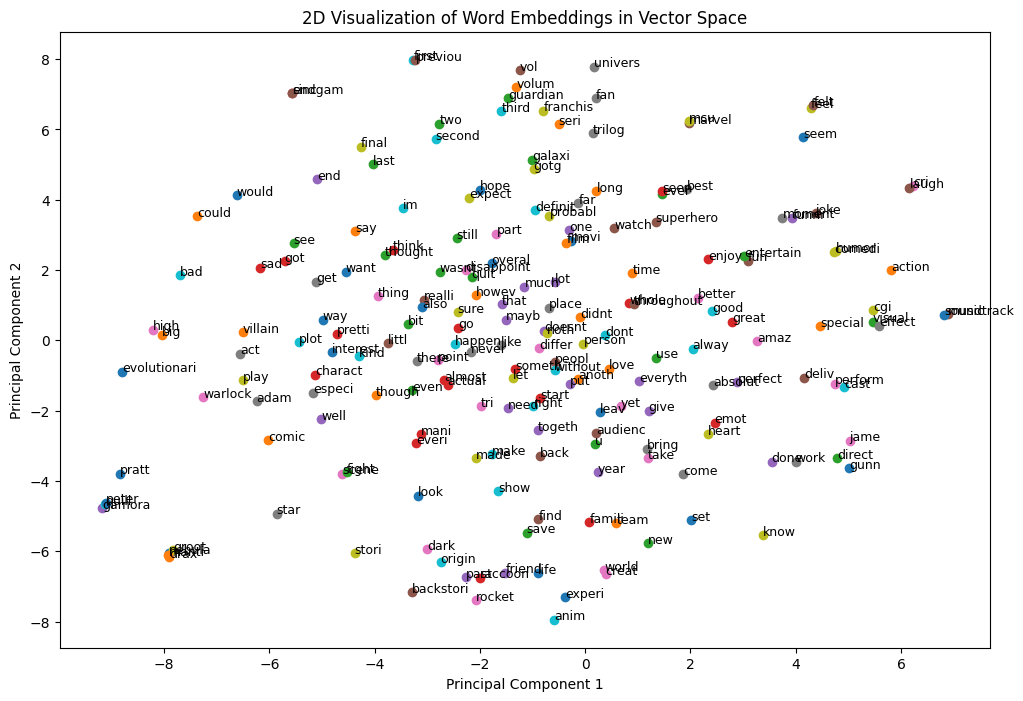

In [10]:
# fetch the top 200 words from the vocabulary
words = list(word2VecModel.wv.index_to_key)[:200]
# extracting the word vectors for these 200 words
vectors = word2VecModel.wv[words]

# reducing dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
# applying t-SNE to the word vectors
vectors_2d = tsne.fit_transform(vectors)

# plotting the 2D representation of word embeddings
plt.figure(figsize=(12, 8))
# to iterate over each word and its corresponding index
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=9)

plt.title("2D Visualization of Word Embeddings in Vector Space")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [8]:
# The GitHub link of your final csv file

# Link:

Original data:
https://drive.google.com/drive/u/1/folders/1IKO2k1pW--2ewtz0duqDDzLsgEbB8FLy

Annotated data:
https://github.com/Dheepthi-Reddy/DheepthiReddy_INFO5731_Fall2024/blob/main/Annotated_UserReviews.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [9]:
# Type your answer
'''
I found the first question a bit complicated, given we have to implement it from scratch without using any inbuilt libraries.
I liked working on 3rd and 4th questions which is creating and training the model and as well as evaluating the sentiment analysis of the reviews dataset.
I would like get more time on the assignments, as they carry more points than excercises, and especially when we have both excercise and assignment submissions close by.

'''

'\nI found the first question a bit complicated, given we have to implement it from scratch without using any inbuilt libraries.\nI liked working on 3rd and 4th questions which is creating and training the model and as well as evaluating the sentiment analysis of the reviews dataset.\nI would like get more time on the assignments, as they carry more points than excercises, and especially when we have both excercise and assignment submissions close by. \n\n'